In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Amazon Stock Price Prediction.
data=pd.read_csv("AMZNtrain.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [6]:
train=data.iloc[:,1:2].values
print(train)
print(train.shape)

[[ 398.799988]
 [ 398.290009]
 [ 395.850006]
 ...
 [1454.199951]
 [1473.349976]
 [1510.800049]]
(1258, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scale_train=scaler.fit_transform(train)
scale_train

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [10]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(scale_train[i-60:i,0])
    y_train.append(scale_train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [14]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 76ms/step - loss: 0.0221
Epoch 2/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0036
Epoch 3/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0031
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0030
Epoch 5/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0029
Epoch 6/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0029
Epoch 8/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0025
Epoch 9/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0023
Epoch 10/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0020
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0025
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 78ms/step - loss: 0.0012


In [15]:
data_t=pd.read_csv("AMZNtest.csv")
actual_stock_price=data_t.iloc[:,1:2].values

In [17]:
data_total=pd.concat((data['Open'],data_t['Open']),axis=0)
inputs=data_total[len(data_total)-len(data_t)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


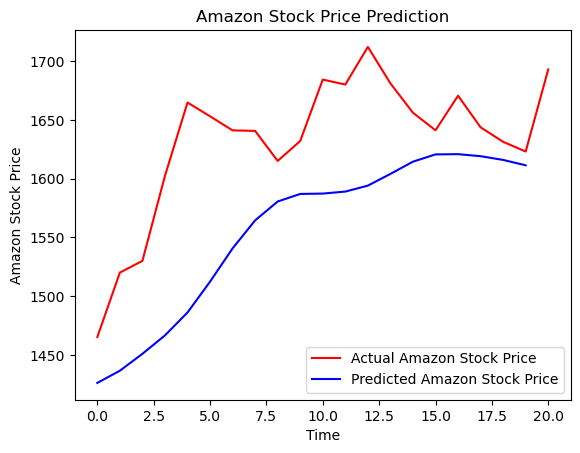

In [19]:
plt.plot(actual_stock_price,color='red',label="Actual Amazon Stock Price")
plt.plot(predicted_stock_price,color='blue',label="Predicted Amazon Stock Price")
plt.title("Amazon Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Amazon Stock Price")
plt.legend()

In [ ]:
#The model can predict the trend of the actual stock prices very closely. 
#The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.